In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import uniform
import requests
import time
import json
# Import API key

from config import api_key
#print(api_key)



#from config import api_key

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citylats = []
citylngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])
        # Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities saved")
print(f"There are {len(citylats)} lats saved")

There are 606 cities saved
There are 606 lats saved


In [3]:

city_df = pd.DataFrame({'cities':cities})

city_df['Latitude'] = ""
city_df['Temperature'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness (%)'] = ""
city_df['Wind Speed (mph)'] = ""


city_df


,cities,Latitude,Temperature,Humidity,Cloudiness (%),Wind Speed (mph)
0,tumannyy,,,,,
1,illoqqortoormiut,,,,,
2,rikitea,,,,,
3,ushuaia,,,,,
4,port alfred,,,,,
5,nizhneyansk,,,,,
6,mergui,,,,,
7,pevek,,,,,
8,atasu,,,,,
9,padang,,,,,


In [45]:
# OpenWeatherMap API Key
#api_key = api_key.api_keys

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Adding len (cities) to a variable
cities_count = len(cities)

#Creating Counters to keep track of cities with temp info and cities without temp info
#city_with_temp_info = 0
#city_without_info = 0

cities_data = []

#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)


# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

city_without_info = []      
            
            
            
            # OpenWeatherMap API Key
import json
row_count=1
#city_without_info = 0
#api_key = api_keys.api_key
# Starting URL for Weather Map API Call
for city in cities[:600]: #everything up to the 10th value. The slice operation.
    
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(url).json()
    #print(json.dumps(response,indent=4,sort_keys=True))
    print("------------------------")
    
    print(url)
    try:
        Lat=response['coord']['lat']
        Temperature=response['main']['temp']
        Humidity=response['main']['humidity']
        Cloudiness=response['clouds']['all']
        Wind=response['wind']['speed']
        cities_data.append([city,Lat,Temperature, Humidity, Cloudiness, Wind])
    except(KeyError):
        city_without_info.append(city)
        print("Cityn Not found because of missing info... skip.")
cities_data   

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=fort saint john
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=port alfred
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=cape town
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=lolua
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tuktoyaktuk
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=busselton
------------------------
http://api.openweathermap.org/data/2.5/weat

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kaitangata
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ushuaia
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=laguna
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=skagastrond
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ozinki
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kyshtovka
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=borup
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=lompoc
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=klaksvik
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=yumen
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tasiilaq
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pahrump
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=krasnoselkup
Cityn Not found because of missing info... ski

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=sochi
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=los llanos de aridane
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=nioro
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=torbay
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=quatre cocos
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=samusu
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=wamba
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=gurskoye
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=gusau
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=constitucion
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=agua fria
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=amapa
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=nome


------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=debre zeyit
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=foki
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=thompson
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=iqaluit
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=himora
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=paytug
Cityn Not found because of missing info... skip.
------------------------
http://api.o

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=mustvee
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=havre-saint-pierre
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=touho
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=new kensington
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=codrington
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kokkola
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tabukiniberu
Cityn Not found because 

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=bron
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=tabuk
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=cherskiy
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=nara
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=new port richey
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=dawei
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=khamanon
------------------------
http://api.openweatherm

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=palaiokomi
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kindu
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=cassilandia
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=kununurra
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=ladario
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=cockburn harbour
Cityn Not found because of missing info... skip.
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pandamatenga
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pyshma
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=pochutla
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=fortuna
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=energetik
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=dudinka
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=howard springs
------------------------
http://ap

------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=daru
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=vao
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=southbridge
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=camacha
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=wanlaweyn
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=sitka
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e111ce553cda1cdb3b5082f740c5e260&q=inhambane
------------------------
http://api.openweatherma

[['port alfred', -33.59, 69.52, 92, 76, 10.65],
 ['cape town', -33.93, 64.4, 82, 0, 13.87],
 ['tuktoyaktuk', 69.44, 19.4, 92, 90, 8.05],
 ['busselton', -33.64, 72.4, 75, 0, 12.77],
 ['georgetown', 6.8, 77, 100, 0, 4.7],
 ['nouadhibou', 20.93, 69.8, 88, 40, 6.93],
 ['khatanga', 71.98, 11.29, 90, 80, 7.07],
 ['kattivakkam', 13.22, 89.6, 59, 40, 9.17],
 ['hobart', -42.88, 60.8, 54, 0, 18.34],
 ['punta arenas', -53.16, 44.6, 87, 90, 14.99],
 ['pevek', 69.7, 13, 100, 56, 3.49],
 ['brae', 60.4, 40.77, 81, 20, 21.92],
 ['lagos', 6.46, 77, 94, 20, 2.24],
 ['carbonia', 39.17, 54.41, 93, 0, 4.7],
 ['smithers', 54.78, 33.8, 74, 1, 2.26],
 ['talnakh', 69.49, 23.66, 96, 92, 6.73],
 ['rosario', -34.31, 55.21, 92, 44, 8.19],
 ['rikitea', -23.12, 71.68, 100, 64, 10.2],
 ['jamestown', -33.21, 81.4, 24, 0, 6.96],
 ['chapais', 49.78, 23, 79, 90, 4.7],
 ['bethel', 60.79, 33.8, 86, 40, 10.29],
 ['belinskiy', 52.97, 37.43, 100, 64, 8.41],
 ['mancora', -4.1, 61.01, 95, 20, 6.06],
 ['cabo san lucas', 22.89, 7

In [47]:
city_without_info

['fort saint john',
 'lolua',
 'kemijarvi',
 'nizhneyansk',
 'taolanaro',
 'halalo',
 'mys shmidta',
 'skagastrond',
 'illoqqortoormiut',
 'palabuhanratu',
 'bolungarvik',
 'nguiu',
 'tsihombe',
 'belushya guba',
 'wahran',
 'olafsvik',
 'amderma',
 'bengkulu',
 'krasnoselkup',
 'karaul',
 'doctor pedro p. pena',
 'chagda',
 'vaitupu',
 'tidore',
 'samusu',
 'grand river south east',
 'pilao arcado',
 'umzimvubu',
 'tumannyy',
 'warqla',
 'attawapiskat',
 'culipapa',
 'jibuti',
 'gurskoye',
 'tuggurt',
 'sentyabrskiy',
 'mergui',
 'debre zeyit',
 'himora',
 'paytug',
 'kegayli',
 'ayios matthaios',
 'camana',
 'barentsburg',
 'berbera',
 'tabukiniberu',
 'taburao',
 'korla',
 'hurghada',
 'bargal',
 'bac lieu',
 'wulanhaote',
 'gzhatsk',
 'yambio',
 'afgoye',
 'tahta',
 'yialos',
 'zachagansk',
 'rungata',
 'cockburn harbour',
 'unguia',
 'eskasem',
 'aflu',
 'dalinghe',
 'burica',
 'kyra',
 'yanchukan',
 'viligili',
 'kamenskoye',
 'paradwip',
 'geresk',
 'mafinga',
 'petapa']

In [48]:
#Create a dataframe
cities_data_df = pd.DataFrame(cities_data,columns = ['city','Lat','Temperature', 'Humidity','Cloudiness', 'Wind'])
cities_data_df

,city,Lat,Temperature,Humidity,Cloudiness,Wind
0,port alfred,-33.59,69.52,92,76,10.65
1,cape town,-33.93,64.40,82,0,13.87
2,tuktoyaktuk,69.44,19.40,92,90,8.05
3,busselton,-33.64,72.40,75,0,12.77
4,georgetown,6.80,77.00,100,0,4.70
5,nouadhibou,20.93,69.80,88,40,6.93
6,khatanga,71.98,11.29,90,80,7.07
7,kattivakkam,13.22,89.60,59,40,9.17
8,hobart,-42.88,60.80,54,0,18.34
9,punta arenas,-53.16,44.60,87,90,14.99


In [49]:
# OpenWeatherMap API Key
#api_key = api_key.api_keys

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# Adding len (cities) to a variable
cities_count = len(cities)

#Creating Counters to keep track of cities with temp info and cities without temp info
#city_with_temp_info = 0
#city_without_info = 0


#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

            
            
            
            
            # OpenWeatherMap API Key
import json
row_count=1
#city_without_info = 0
#api_key = api_keys.api_key
# Starting URL for Weather Map API Call
for index,row in city_df.iterrows():
    city = row['cities']
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "&q=" + city
    response = requests.get(url).json()
    #print(json.dumps(response,indent=4,sort_keys=True))
    print("------------------------")
    print("Proceesing:#%s: %s" % (index + 1, city_df.loc[index,"cities"]))
    print(url)
    try:
        clean_cities_df.loc[index,'Lat']=response['coord']['lat']
        clean_cities_df.loc[index,'Temperature']=response['main']['temp']
        clean_cities_df.loc[index,'Humidity']=response['main']['humidity']
        clean_cities_df.loc[index,'Cloudiness (%)']=response['clouds']['all']
        clean_cities_df.loc[index,'Wind Speed (mph)']=response['wind']['speed']
    except(KeyError):
        
        print("Cityn Not found because of missing info... skip.")
        row_count += 1
        if cities_count-row_count < 510:
            break

------------------------
Proceesing:#1: fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=fort saint john
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#2: port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port alfred
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#3: cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=cape town
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#4: lolua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=lolua
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#5: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tuktoyaktuk
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#6: busselton
http://api.openweathermap.org/data/2.5

------------------------
Proceesing:#47: kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=kodinsk
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#48: vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=vaini
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#49: port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port-gentil
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#50: ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ribeira grande
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#51: sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=sinnamary
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#52: udala
http://api.openweathermap.org/data/2.5/weather

------------------------
Proceesing:#93: tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=tiarei
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#94: mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=mount gambier
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#95: belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=belushya guba
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#96: wahran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=wahran
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#97: axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=axim
Cityn Not found because of missing info... skip.
------------------------
Proceesing:#98: molodizhne
http://api.openweathermap.org/data/2.5/weather?un

In [50]:
cities_data_df['Temperature'].replace('', np.nan, inplace=True)
cities_data_df['Lat'].replace('', np.nan, inplace=True)

cities_data_df

,city,Lat,Temperature,Humidity,Cloudiness,Wind
0,port alfred,-33.59,69.52,92,76,10.65
1,cape town,-33.93,64.40,82,0,13.87
2,tuktoyaktuk,69.44,19.40,92,90,8.05
3,busselton,-33.64,72.40,75,0,12.77
4,georgetown,6.80,77.00,100,0,4.70
5,nouadhibou,20.93,69.80,88,40,6.93
6,khatanga,71.98,11.29,90,80,7.07
7,kattivakkam,13.22,89.60,59,40,9.17
8,hobart,-42.88,60.80,54,0,18.34
9,punta arenas,-53.16,44.60,87,90,14.99


In [51]:
city_cleanedversion_df=cities_data_df.dropna().reset_index(drop=True)
city_cleanedversion_df

,city,Lat,Temperature,Humidity,Cloudiness,Wind
0,port alfred,-33.59,69.52,92,76,10.65
1,cape town,-33.93,64.40,82,0,13.87
2,tuktoyaktuk,69.44,19.40,92,90,8.05
3,busselton,-33.64,72.40,75,0,12.77
4,georgetown,6.80,77.00,100,0,4.70
5,nouadhibou,20.93,69.80,88,40,6.93
6,khatanga,71.98,11.29,90,80,7.07
7,kattivakkam,13.22,89.60,59,40,9.17
8,hobart,-42.88,60.80,54,0,18.34
9,punta arenas,-53.16,44.60,87,90,14.99


In [52]:
# Save data to a CSV file
city_cleanedversion_df.to_csv("City_Data.csv")

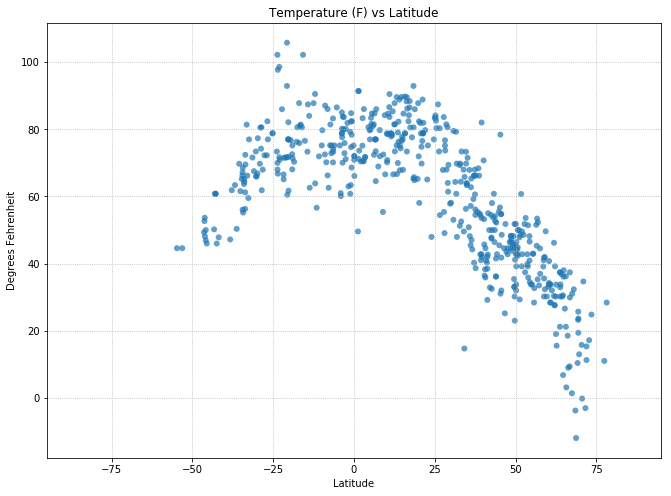

In [53]:
# Build a scatter plot for each data type
plt.figure(figsize=(11,8))
plt.scatter(city_cleanedversion_df["Lat"], city_cleanedversion_df["Temperature"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.70)
# Incorporate the other graph properties
plt.title("Temperature (F) vs Latitude")
plt.ylabel("Degrees Fehrenheit")
plt.xlabel("Latitude")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("Temperature vs Latitude.png")

plt.show()

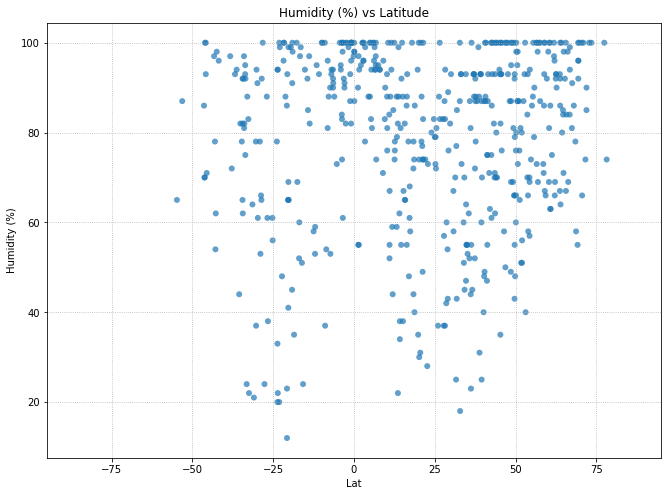

In [54]:

# Build a scatter plot for each data type
plt.figure(figsize=(11,8))
plt.scatter(city_cleanedversion_df["Lat"], city_cleanedversion_df["Humidity"], edgecolor="none", linewidths=0.5, marker="o", alpha=0.70)
# Incorporate the other graph properties
plt.title("Humidity (%) vs Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Lat")
plt.grid(linestyle='dotted')
plt.xlim([-95, 95])

# Save the figure
plt.savefig("HumidityvsLat.png")

plt.show()

In [ ]:
# Create new DF with only cities that have temperature data
cities_with_temp_df = city_df.dropna(subset=['Temperature'])
cities_with_temp_df